In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import nan as NA
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder

In [2]:
train_data =  pd.read_csv("train.csv")
#替换缺失值"？"为NA
train_data.replace(' ?', NA, inplace = True)
#返回有nan的列
train_data.isna().any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
exceeds50K        False
dtype: bool

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24421 entries, 0 to 24420
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             24421 non-null  int64 
 1   workclass       23029 non-null  object
 2   fnlwgt          24421 non-null  int64 
 3   education       24421 non-null  object
 4   education-num   24421 non-null  int64 
 5   marital-status  24421 non-null  object
 6   occupation      23022 non-null  object
 7   relationship    24421 non-null  object
 8   sex             24421 non-null  object
 9   capital-gain    24421 non-null  int64 
 10  capital-loss    24421 non-null  int64 
 11  hours-per-week  24421 non-null  int64 
 12  native-country  24011 non-null  object
 13  exceeds50K      24421 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 2.6+ MB


<AxesSubplot:xlabel='exceeds50K', ylabel='count'>

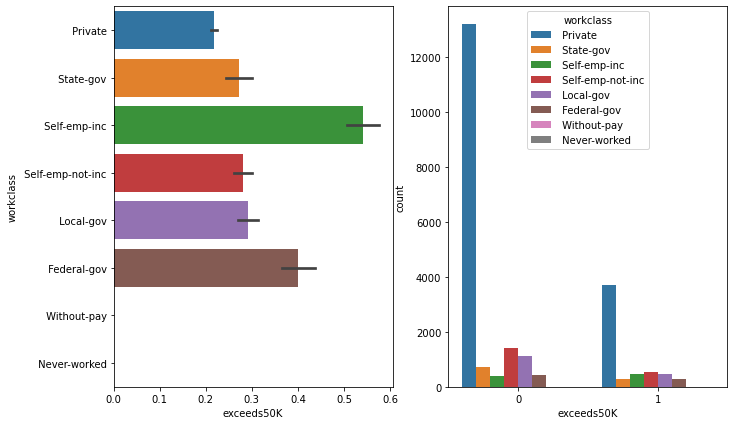

In [4]:
#职业类别和工资的关系
fig,axes=plt.subplots(1,2,figsize=(11, 7))
sns.barplot(data = train_data, x='exceeds50K',y = 'workclass',ax=axes[0])
sns.countplot(x='exceeds50K', hue='workclass', data = train_data, ax=axes[1])

<AxesSubplot:xlabel='education-num', ylabel='count'>

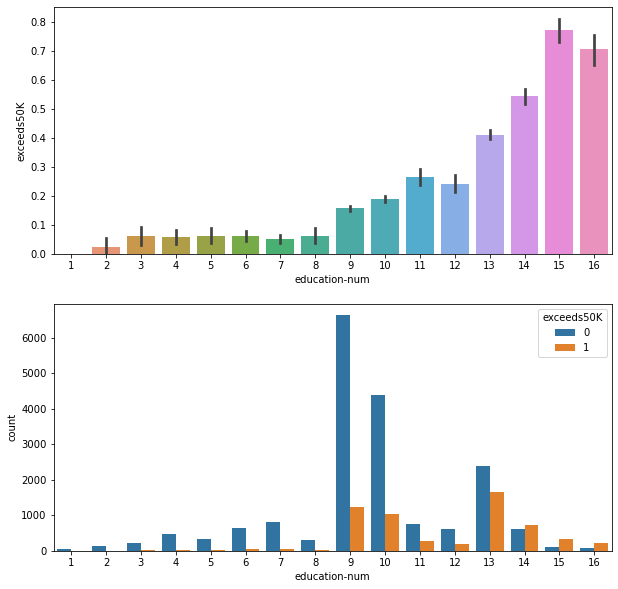

In [5]:
#教育和工资的关系，受教育程度越高，工资越高
fig,axes=plt.subplots(2,1,figsize=(10, 10))
sns.barplot(data = train_data,x='education-num',y = 'exceeds50K',ax=axes[0])
sns.countplot(x='education-num' ,hue='exceeds50K', data = train_data, ax=axes[1])

<AxesSubplot:xlabel='exceeds50K', ylabel='count'>

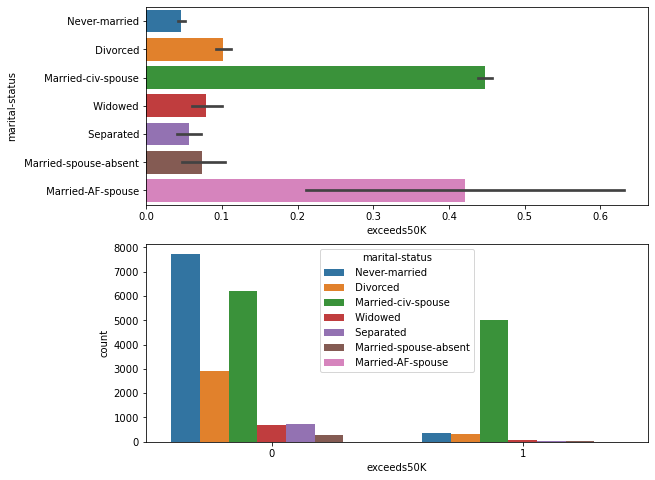

In [6]:
#婚姻状况与工资的关系
fig,axes=plt.subplots(2,1,figsize=(9, 8))
sns.barplot(data = train_data,x='exceeds50K',y = 'marital-status',ax=axes[0])
sns.countplot(x='exceeds50K' ,hue='marital-status', data = train_data, ax=axes[1])

<AxesSubplot:xlabel='exceeds50K', ylabel='count'>

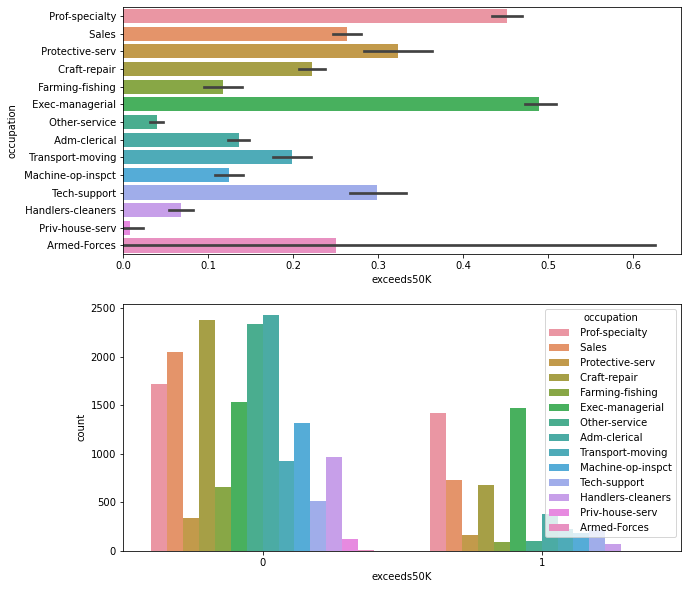

In [7]:
#工作行业与工资的关系  AF疑似异常值
fig,axes=plt.subplots(2,1,figsize=(10,10))
sns.barplot(data = train_data,x='exceeds50K',y = 'occupation',ax=axes[0])
sns.countplot(x='exceeds50K' ,hue='occupation', data = train_data, ax=axes[1])

<AxesSubplot:xlabel='relationship', ylabel='count'>

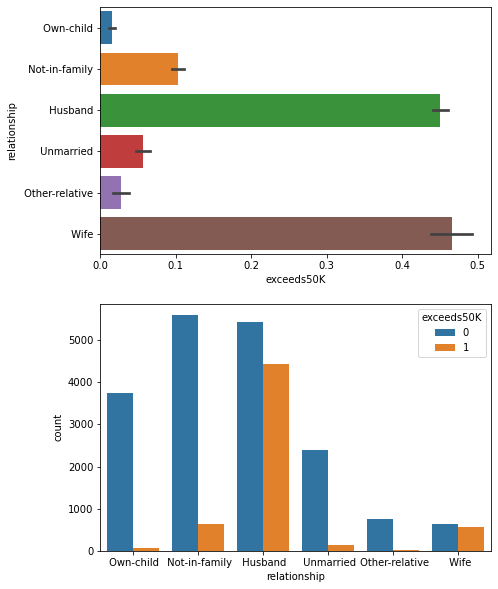

In [8]:
fig,axes=plt.subplots(2,1,figsize=(7,10))
sns.barplot(data = train_data,x='exceeds50K',y = 'relationship',ax=axes[0])
sns.countplot(x='relationship',hue = 'exceeds50K', data = train_data, ax=axes[1])

<AxesSubplot:xlabel='sex', ylabel='count'>

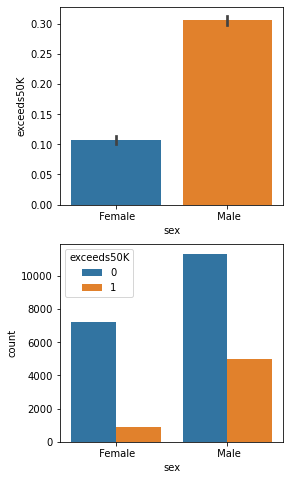

In [9]:
#性别和工资想关系
fig,axes=plt.subplots(2,1,figsize=(4,8))
sns.barplot(data = train_data,x='sex',y = 'exceeds50K',ax=axes[0])
sns.countplot(data=train_data,x='sex',hue='exceeds50K' , ax=axes[1])

<AxesSubplot:xlabel='capital-loss', ylabel='exceeds50K'>

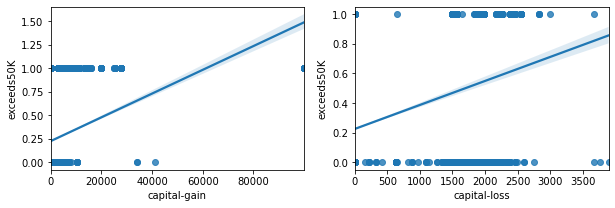

In [10]:
#资本收益和工资的关系
fig,axes=plt.subplots(1,2,figsize=(10,3))
sns.regplot(x='capital-gain',y='exceeds50K',data=train_data,ax=axes[0])
sns.regplot(x='capital-loss',y='exceeds50K',data=train_data,ax=axes[1])

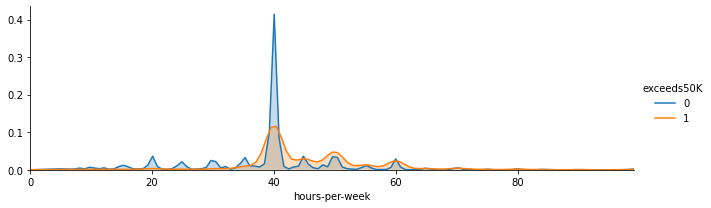

In [11]:


#创建坐标轴
ageFacet=sns.FacetGrid(train_data,hue='exceeds50K',aspect=3)
#作图，选择图形类型
ageFacet.map(sns.kdeplot,'hours-per-week',shade=True)
#其他信息：坐标轴范围、标签等
ageFacet.set(xlim=(0,train_data['hours-per-week'].max()))
ageFacet.add_legend()

<AxesSubplot:xlabel='hours-per-week', ylabel='count'>

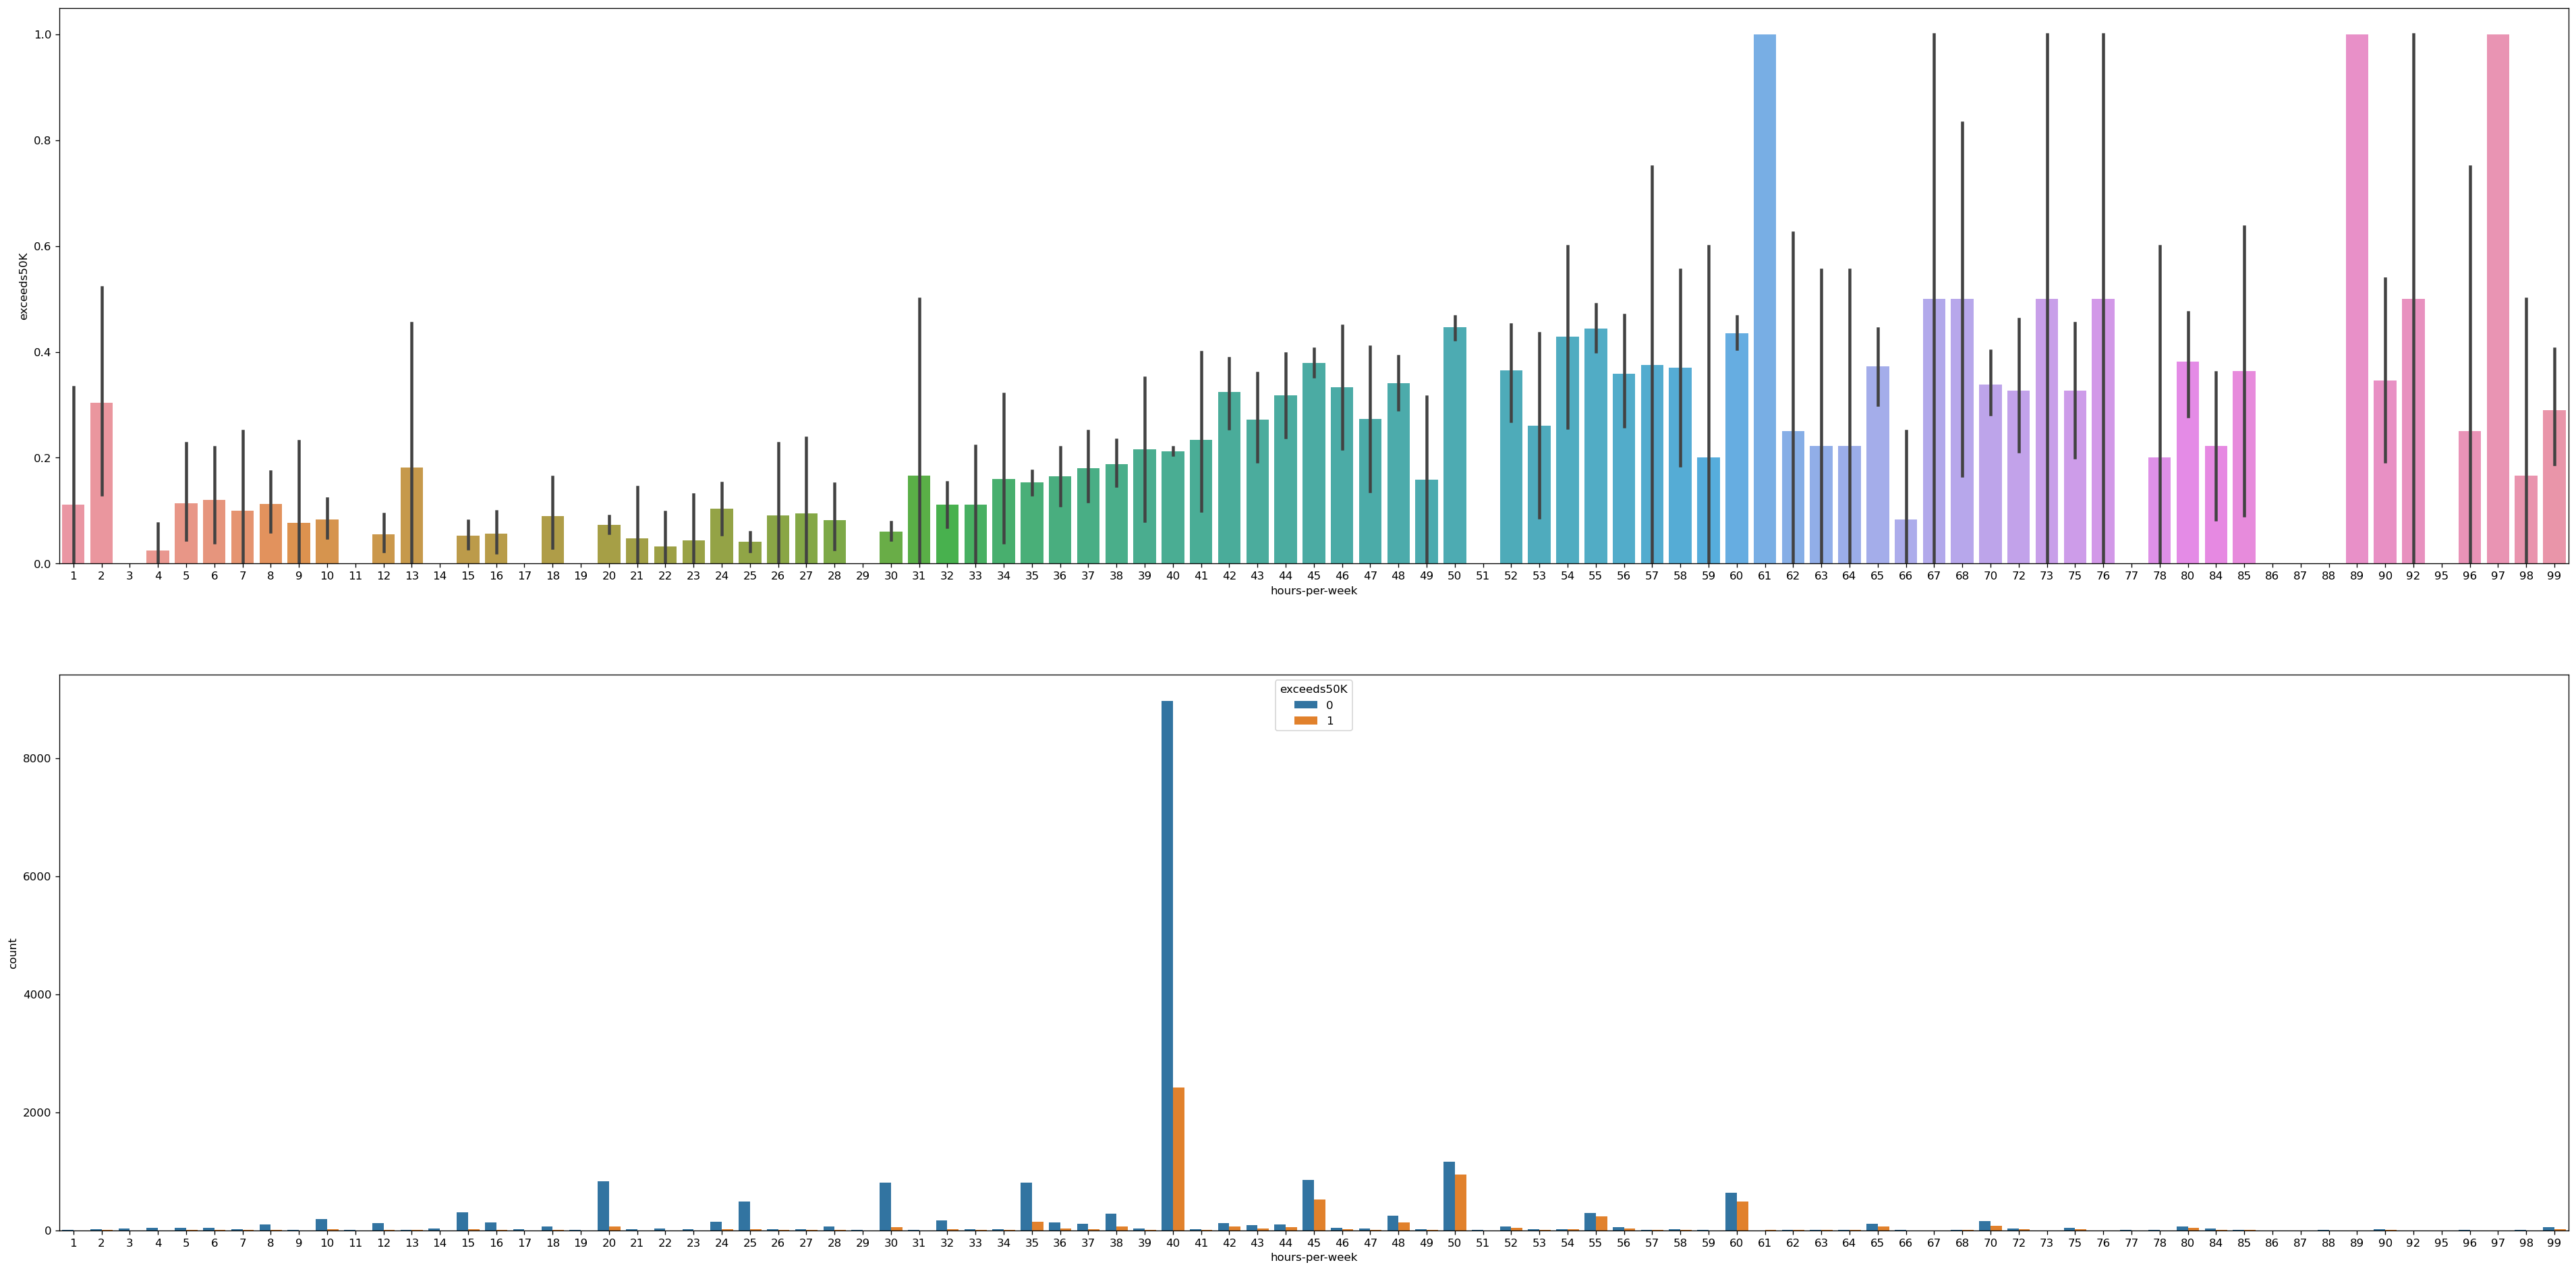

In [12]:
#每周工作时长，每周40小时为正常工作时长
fig,axes=plt.subplots(2,1,figsize=(40,20),dpi=120)
sns.barplot(data = train_data,x='hours-per-week',y = 'exceeds50K',ax=axes[0])
sns.countplot(data=train_data,x='hours-per-week',hue='exceeds50K',ax=axes[1])

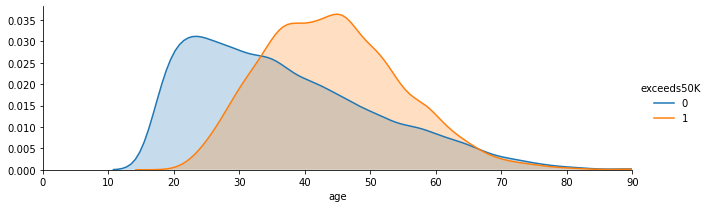

In [13]:
#创建坐标轴
ageFacet=sns.FacetGrid(train_data,hue='exceeds50K',aspect=3)
#作图，选择图形类型
ageFacet.map(sns.kdeplot,'age',shade=True)
#其他信息：坐标轴范围、标签等
ageFacet.set(xlim=(0,train_data['age'].max()))
ageFacet.add_legend()

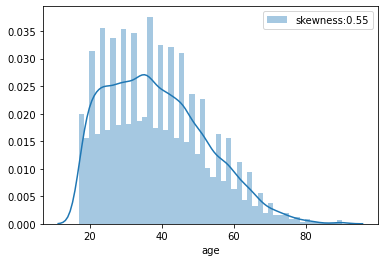

In [14]:
#查看fare分布
agePlot=sns.distplot(train_data['age'],label='skewness:%.2f'%(train_data['age'].skew()))
agePlot.legend(loc='best')

In [15]:

#替换NAN的值为Unknown
train_data['workclass'].replace(NA, 'Unknown', inplace = True)
train_data['occupation'].replace(NA, 'Unknown', inplace = True)
train_data['native-country'].replace(NA, 'Unknown', inplace = True)
#train_data
#[col for col in train_data]

In [16]:
train_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,exceeds50K
0,30,Unknown,147215,Some-college,10,Never-married,Unknown,Own-child,Female,0,0,30,United-States,0
1,60,Private,173960,Bachelors,13,Divorced,Prof-specialty,Not-in-family,Female,0,0,42,United-States,0
2,52,Unknown,105428,Some-college,10,Married-civ-spouse,Unknown,Husband,Male,0,0,12,United-States,0
3,37,Private,112497,Bachelors,13,Married-civ-spouse,Sales,Husband,Male,0,0,60,United-States,0
4,63,Private,137843,Some-college,10,Married-civ-spouse,Sales,Husband,Male,7298,0,48,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24416,44,Private,104196,Masters,14,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,45,United-States,1
24417,52,Private,112959,Some-college,10,Widowed,Sales,Not-in-family,Female,0,0,40,United-States,0
24418,50,State-gov,263200,Assoc-voc,11,Divorced,Adm-clerical,Unmarried,Female,0,0,40,Ecuador,0
24419,25,Private,228608,Some-college,10,Never-married,Craft-repair,Other-relative,Female,0,0,40,Cambodia,0


In [18]:
#国家数据重分类
country = train_data['native-country']
country_type = country.unique()
for native_country in country_type:
    if native_country != ' United-States' and native_country != 'Unknown':
        train_data['native-country'].replace(native_country, 'Non_US', inplace = True)

train_data['native-country'].replace(' United-States', 'US', inplace = True)
        
#train_data

In [19]:
encoder = OrdinalEncoder(cols = ['sex']).fit(train_data,train_data.iloc[:,-1]) # 转换sex为 female为1 和 male为2
train_data = encoder.transform(train_data)
train_data 

/Users/zachary-sun/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,exceeds50K
0,30,Unknown,147215,Some-college,10,Never-married,Unknown,Own-child,1,0,0,30,US,0
1,60,Private,173960,Bachelors,13,Divorced,Prof-specialty,Not-in-family,1,0,0,42,US,0
2,52,Unknown,105428,Some-college,10,Married-civ-spouse,Unknown,Husband,2,0,0,12,US,0
3,37,Private,112497,Bachelors,13,Married-civ-spouse,Sales,Husband,2,0,0,60,US,0
4,63,Private,137843,Some-college,10,Married-civ-spouse,Sales,Husband,2,7298,0,48,US,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24416,44,Private,104196,Masters,14,Married-civ-spouse,Exec-managerial,Husband,2,0,0,45,US,1
24417,52,Private,112959,Some-college,10,Widowed,Sales,Not-in-family,1,0,0,40,US,0
24418,50,State-gov,263200,Assoc-voc,11,Divorced,Adm-clerical,Unmarried,1,0,0,40,Non_US,0
24419,25,Private,228608,Some-college,10,Never-married,Craft-repair,Other-relative,1,0,0,40,Non_US,0


In [20]:
pd.set_option('display.max_columns', None)
#workclass转化为哑变量
workclass_dummy= pd.get_dummies(train_data['workclass'],prefix='workclass')
train_data=pd.concat([train_data,workclass_dummy],axis=1)
#marital转化为哑变量
martial_dummy= pd.get_dummies(train_data['marital-status'],prefix='marital-status')
train_data=pd.concat([train_data,martial_dummy],axis=1)
#occupation转化为哑变量
occupation_dummy= pd.get_dummies(train_data['occupation'],prefix='occupation')
train_data=pd.concat([train_data,occupation_dummy],axis=1)
#relationship转化为哑变量
relationship_dummy= pd.get_dummies(train_data['relationship'],prefix='relationship')
train_data=pd.concat([train_data,relationship_dummy],axis=1)
#sex转化为哑变量
# sex_dummy= pd.get_dummies(train_data['sex'],prefix='sex')
# train_data=pd.concat([train_data,sex_dummy],axis=1)
# native-country转化为哑变量
native_country_dummy= pd.get_dummies(train_data['native-country'],prefix='native-country')
train_data=pd.concat([train_data,native_country_dummy],axis=1)

train_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,exceeds50K,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_Unknown,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_Unknown,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,native-country_Non_US,native-country_US,native-country_Unknown
0,30,Unknown,147215,Some-college,10,Never-married,Unknown,Own-child,1,0,0,30,US,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,60,Private,173960,Bachelors,13,Divorced,Prof-specialty,Not-in-family,1,0,0,42,US,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,52,Unknown,105428,Some-college,10,Married-civ-spouse,Unknown,Husband,2,0,0,12,US,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,37,Private,112497,Bachelors,13,Married-civ-spouse,Sales,Husband,2,0,0,60,US,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,63,Private,137843,Some-college,10,Married-civ-spouse,Sales,Husband,2,7298,0,48,US,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24416,44,Private,104196,Masters,14,Married-civ-spouse,Exec-managerial,Husband,2,0,0,45,US,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
24417,52,Private,112959,Some-college,10,Widowed,Sales,Not-in-family,1,0,0,40,US,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
24418,50,State-gov,263200,Assoc-voc,11,Divorced,Adm-clerical,Unmarried,1,0,0,40,Non_US,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
24419,25,Private,228608,Some-college,10,Never-married,Craft-repair,Other-relative,1,0,0,40,Non_US,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [21]:
#统计各列非缺失值行数
train_data.count()
#删除缺失值的行
train_dropna = train_data.dropna()

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24421 entries, 0 to 24420
Data columns (total 54 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   age                                    24421 non-null  int64 
 1   workclass                              24421 non-null  object
 2   fnlwgt                                 24421 non-null  int64 
 3   education                              24421 non-null  object
 4   education-num                          24421 non-null  int64 
 5   marital-status                         24421 non-null  object
 6   occupation                             24421 non-null  object
 7   relationship                           24421 non-null  object
 8   sex                                    24421 non-null  int64 
 9   capital-gain                           24421 non-null  int64 
 10  capital-loss                           24421 non-null  int64 
 11  hours-per-week 

In [23]:
#运行一次即可,gain=gain-loss
for i in range (train_data.shape[0]):
    t = train_data.iloc[i,9]-train_data.iloc[i,10]
    train_data.iloc[i,9] = t

train_data.head(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,exceeds50K,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_Unknown,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_Unknown,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,native-country_Non_US,native-country_US,native-country_Unknown
0,30,Unknown,147215,Some-college,10,Never-married,Unknown,Own-child,1,0,0,30,US,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,60,Private,173960,Bachelors,13,Divorced,Prof-specialty,Not-in-family,1,0,0,42,US,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,52,Unknown,105428,Some-college,10,Married-civ-spouse,Unknown,Husband,2,0,0,12,US,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,37,Private,112497,Bachelors,13,Married-civ-spouse,Sales,Husband,2,0,0,60,US,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
4,63,Private,137843,Some-college,10,Married-civ-spouse,Sales,Husband,2,7298,0,48,US,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
5,23,State-gov,82067,Assoc-voc,11,Married-civ-spouse,Protective-serv,Husband,2,0,0,40,US,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
6,47,Self-emp-inc,212120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,2,0,0,40,US,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
7,48,Self-emp-not-inc,171986,HS-grad,9,Divorced,Prof-specialty,Not-in-family,2,0,0,15,US,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
8,24,Private,180060,Assoc-acdm,12,Never-married,Craft-repair,Not-in-family,2,2354,0,40,US,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
9,25,Self-emp-not-inc,159909,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,2,0,0,40,US,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [24]:
feature = train_data.drop(['exceeds50K','capital-loss','workclass','education','marital-status','occupation','relationship','native-country'],axis = 1)
label = train_data['exceeds50K']
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24421 entries, 0 to 24420
Data columns (total 46 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   age                                    24421 non-null  int64
 1   fnlwgt                                 24421 non-null  int64
 2   education-num                          24421 non-null  int64
 3   sex                                    24421 non-null  int64
 4   capital-gain                           24421 non-null  int64
 5   hours-per-week                         24421 non-null  int64
 6   workclass_ Federal-gov                 24421 non-null  uint8
 7   workclass_ Local-gov                   24421 non-null  uint8
 8   workclass_ Never-worked                24421 non-null  uint8
 9   workclass_ Private                     24421 non-null  uint8
 10  workclass_ Self-emp-inc                24421 non-null  uint8
 11  workclass_ Self-emp-not-inc 

<AxesSubplot:xlabel='capital-gain', ylabel='exceeds50K'>

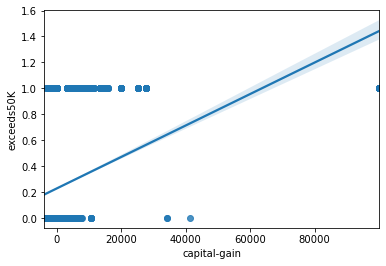

In [25]:
sns.regplot(x='capital-gain',y='exceeds50K',data=train_data)

In [ ]:
#分离离散和连续变量
feature_continuous = feature.iloc[:,[0,1,2,4,5]]
feature_continuous
feature_discrete = feature.iloc[:,6:46]
feature_discrete

In [ ]:
#取出
#np.set_printoptions(threshold=np.inf)
y = np.array(label.values)
X = np.array(feature)

y,X

In [ ]:

chi2list = np.zeros([41,2]).astype(int)

chi2list[0,0] = 3
chi2list[0,1] = chi2(X[:,3].reshape(-1,1), y)[0][0]
# chi2list.append([3, chi2(X[:,3].reshape(-1,1), y)[0][0]])

for idx in range(6,46):
    score, p_value = chi2(X[:,idx].reshape(-1,1), y)
    i = idx - 5
    chi2list[i,0] = idx
    chi2list[i,1] = score[0]

sort_list = chi2list[np.lexsort(-chi2list.T)]
sort_list
    #print(f"第{idx + 1}个变量与因变量的卡方统计量为{round(score[0],2)}，p值为{round(p_value[0],3)}")

    


In [ ]:
from sklearn.feature_selection import f_classif


for idx in range(0,6):
    score, p_value = f_classif(X[:,idx].reshape(-1,1), y)
    print(f"第{idx + 1}个变量与因变量的ANOVA-F统计量为{round(score[0],2)}，p值为{round(p_value[0],3)}")


In [ ]:
# sklearn 中直接提供了函数用于计算卡方统计量
# SelectKBest 将会基于一个判别函数自动选择得分高的变量
# 这里的判别函数为F统计量

X_ = np.array(feature_discrete)
y_ = np.array(label)


selector = SelectKBest(chi2, k=30) # k => 我们想要选择的变量数
selector.fit(feature_discrete, label) # 在训练集上训练
transformed_train = selector.transform(feature_discrete)
transformed_train
# indices = SelectKBest(chi2,k=30).fit(X_,y_).get_support(indices =True) # 返回索引
# indices



In [ ]:
# sklearn 中直接提供了函数用于计算ANOVA-F
# SelectKBest 将会基于一个判别函数自动选择得分高的变量
# 这里的判别函数为F统计量


X_1 = np.array(feature_continuous)


selector_f = SelectKBest(f_classif,k=5) # k => 我们想要选择的变量数
selector_f.fit(feature_continuous, label) # 在训练集上训练
transformed_train1 = selector_f.transform(feature_continuous)
transformed_train1
# indices = SelectKBest(f_classif,k=5).fit(X_1,y_).get_support(indices =True) # 返回索引
# indices




In [ ]:
#合并两个数组
trainformed_train_data = np.hstack((transformed_train1,transformed_train))
trainformed_train_data

In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(trainformed_train_data, y_)

from sklearn.model_selection  import cross_val_score
f1 = cross_val_score(clf, trainformed_train_data, y_, cv = 10, scoring = "f1")
f1

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg=forest_reg.fit(trainformed_train_data,y_)

from sklearn.model_selection  import cross_val_score
accuracy = cross_val_score(forest_reg, trainformed_train_data, y, cv = 10, scoring = "f1")
accuracy
#特征不能是连续值和二分的集合？


In [ ]:
corrt = train_data.corr()
corrt

In [ ]:
X[:,8:12]

In [ ]:
for i in range (X.shape[0]):
    t=X[i,9]-X[i,10]
    X[i,9] = t
    if(X[i,9]!= 0):
        print(X[i,9])
    

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=20)
clf = clf.fit(X,y)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg=forest_reg.fit(X,y)

In [ ]:
from sklearn.model_selection  import cross_val_score
accuracy = cross_val_score(forest_reg, X, y, cv = 10, scoring = "f1")
accuracy

enc = OneHotEncoder(sparse = False)
result = enc.fit_transform(train_dropna[[1]])

In [ ]:
predict_data = pd.read_csv("test.csv")
predict_data.replace(' ?', NA, inplace = True)
predict_data.isna().any()

In [ ]:
#删除缺失值的行
predict_dropna = train_data.dropna()
predict_dropna

In [ ]:
train_data.plot(kind='scatter',x='age',y='exceeds50K',alpha=0.005)